### NLP/NLU Model Which summerizes Medical Research Paper which makes them easier to read for Student
* In this Model We are Replicating Model proposed in paper [2017 PubMed 200k RCT](https://arxiv.org/abs/1710.06071)
* Dateset is freely available at [GITHUB](https://github.com/Franck-Dernoncourt/pubmed-rct)

In [27]:
def read_lines_from_txt(filename):
    """
    Reads a file named filename and returns lines of text as list
    Args:
      filename: string of target filepath
    Returns: list of string, one string per line as a list item
    """
    with open(filename, 'r') as f:
        return f.readlines()


def seprate_label_from_sentence(line,line_number):
    """
    seprate line with delimeter "\t


    """
    if (line[:3] != "###") and (line[:2] != "\n"):

        lst = line.split("\t")
        lst[1] = lst[1].replace("\n","")
        return {"target": lst[0],
                "text": lst[1].lower(),
                "line_number":line_number
                }

    else:
        pass


def extract_para(file_line_list):



    """
    will create dictionary object which contains all paragraph as indexed object
    eg. extract_para(train_txt_lines)[0] is a paragraph dict object extracted from txt file
    eg. extract_para(train_txt_lines)[0]["entire_para"][0] is a paragraph's {text,target} object

    return dict:
    {
    total_para:
    0:
    1:
    .
    .
    total_para
    }
    ----------
    index
    {
    entire_para: list of dic object containing target, text
    total_lines:total lines in para

    }


    :param file_line_list: txt file path
    :Note para is seprated by ###
    :return: dictionary conataining total_para, indexed para dic object
    """
    all_para = {"total_para": 0}
    i = 0
    line_number = 0
    para = {"entire_para": [],
            "total_lines": 0}

    for line in file_line_list:
        if line[:3] == '###':
            line_number = 0 # reset line number for new para
            all_para[i] = para
            all_para["total_para"] += 1
            para["total_lines"] = len(para["entire_para"]) - 1 # None line is present in list at the end
            para = {"entire_para": [],
                    "total_lines": 0}
            i += 1
            # print("para: \n")
            # print(para)
            # print(" all para: \n")
            # print(all_para)


        else:
            if line != None :

                txt_n_labels = seprate_label_from_sentence(line,line_number)
                # print(txt_n_labels) # will return label and text dict for line

                line_number += 1
                para["entire_para"].append(txt_n_labels)


    return all_para

# def extract_para(file_line_list):
#   all_para =  {}
#   i = 0
#   total = 0
#   para = {}

#   for line in file_line_list:
#     if line == r'###\d+\n':
#       all_para[i] = para
#       para = {}
#       i++
#     else:
#       tex_n_label = seprate_label_from_sentence(line = line,total_line = j)

#       para["target"]

def make_list_of_all_labeled_sentences(data_dic):

    """
    :param data_dic: data dictionary
    :return: list of all data which contains object
    """
    dev_deta_lines = []
    for index in range(len(data_dic) - 1):

        for line in range(data_dic[index]["total_lines"]):
          obj = data_dic[index]["entire_para"][line]
          obj["total_lines"] = data_dic[index]["total_lines"]
          dev_deta_lines.append(obj)

    return dev_deta_lines

from sklearn.metrics import accuracy_score, precision_recall_fscore_support


  # Calculate model accuracy

def accuracy_of_model(y_true,y_pred):
  """


  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  """
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results



In [28]:
import numpy as np

# from helpers import helper as hf   (en - local machine)
import pandas as pd





In [29]:
from tensorflow import constant

In [30]:

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


# data_dir = "../data/pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign"  (en - local machine)


Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 44.99 MiB/s, done.
Resolving deltas: 100% (12/12), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [31]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [32]:
# train_text_lines = hf.read_lines_from_txt(data_dir+"/train.txt")
# test_text_lines = hf.read_lines_from_txt(data_dir+"/test.txt")
# dev_text_lines = hf.read_lines_from_txt(data_dir+"/dev.txt")


train_text_lines = read_lines_from_txt(data_dir+"/train.txt")
test_text_lines = read_lines_from_txt(data_dir+"/test.txt")
dev_text_lines = read_lines_from_txt(data_dir+"/dev.txt")

In [33]:


# train_data_dic = hf.extract_para(train_text_lines)
# test_data_dic = hf.extract_para(test_text_lines)
# dev_data_dic = hf.extract_para(dev_text_lines)

train_data_dic = extract_para(train_text_lines)
test_data_dic = extract_para(test_text_lines)
dev_data_dic = extract_para(dev_text_lines)


* Data Modeling
```
# object return structure

    return dict:
    {
        "total_para":
        0:
        1:
        .
        .
        .
    }


    0 indexed deic structure
    {
        "entire_para": list of dic object containing target, text eg. [ { target:
                                                                          text:
                                                                         },
                                                                         {
                                                                                ..  
                                                                         }
                                                                       ]
        "total_lines":total lines in para

    }
```

In [34]:
print( "train: ", train_data_dic["total_para"], "test:",
test_data_dic["total_para"], "test:",
dev_data_dic["total_para"]  )

train:  15000 test: 2500 test: 2500


In [35]:
len(dev_data_dic[3]["entire_para"]) == dev_data_dic[3]["total_lines"]

False

In [36]:
test_data_dic[2]

{'entire_para': [{'target': 'BACKGROUND',
   'text': 'minimally invasive endovascular aneurysm repair ( evar ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( raaa ) .',
   'line_number': 0},
  {'target': 'BACKGROUND',
   'text': 'the aim of this study was to analyse the cost-effectiveness and cost-utility of evar compared with standard open repair ( or ) in the treatment of raaa , with costs per @-day and @-month survivor as outcome parameters .',
   'line_number': 1},
  {'target': 'METHODS',
   'text': 'resource use was determined from the amsterdam acute aneurysm ( ajax ) trial , a multicentre randomized trial comparing evar with or in patients with raaa .',
   'line_number': 2},
  {'target': 'METHODS',
   'text': 'the analysis was performed from a provider perspective .',
   'line_number': 3},
  {'target': 'METHODS',
   'text': 'all costs were calculated as if all patients had been treated in the same hospital ( onze lieve v

In [37]:
test_data_dic[80]

{'entire_para': [{'target': 'OBJECTIVE',
   'text': 'to determine whether plasma sclerostin levels are affected by applying whole-body vibration treatments .',
   'line_number': 0},
  {'target': 'METHODS',
   'text': 'following a pilot study , the pretsent prospective , randomized , controlled single-blind study was performed on @ healthy volunteer women ( ages @ to @ years ) .',
   'line_number': 1},
  {'target': 'METHODS',
   'text': 'subjects were randomly divided into @ groups , and whole-body vibration was applied to the treatment group but not to the controls .',
   'line_number': 2},
  {'target': 'METHODS',
   'text': 'the plasma sclerostin levels were measured before the treatment and at the @th minute after whole-body vibration on the @st , @nd , and @th days of application .',
   'line_number': 3},
  {'target': 'RESULTS',
   'text': 'the plasma sclerostin level measured at @ min after the whole-body vibration treatment increased @ % ( p = @ ) on the @st day and decreased @ % 

In [38]:
# dev_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(dev_data_dic))
# test_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(test_data_dic))
# train_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(train_data_dic))

dev_data = pd.DataFrame(make_list_of_all_labeled_sentences(dev_data_dic))
test_data = pd.DataFrame(make_list_of_all_labeled_sentences(test_data_dic))
train_data = pd.DataFrame(make_list_of_all_labeled_sentences(train_data_dic))





In [39]:
train_data.head(20)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,12
1,METHODS,a total of @ patients with primary knee oa wer...,1,12
2,METHODS,outcome measures included pain reduction and i...,2,12
3,METHODS,pain was assessed using the visual analog pain...,3,12
4,METHODS,secondary outcome measures included the wester...,4,12
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,12
6,RESULTS,there was a clinically relevant reduction in t...,6,12
7,RESULTS,the mean difference between treatment arms ( @...,7,12
8,RESULTS,"further , there was a clinically relevant redu...",8,12
9,RESULTS,these differences remained significant at @ we...,9,12


In [40]:
dev_data

,target,text,line_number,total_lines
0,BACKGROUND,ige sensitization to aspergillus fumigatus and...,0,10
1,BACKGROUND,it is not clear whether these patients would b...,1,10
2,OBJECTIVE,we sought to determine whether a @-month cours...,2,10
3,METHODS,asthmatic patients who were ige sensitized to ...,3,10
4,METHODS,primary outcomes were improvement in quality o...,4,10
...,...,...,...,...
30193,RESULTS,in patients with uncontrolled or untreated hyp...,7,12
30194,RESULTS,the mean difference in total ipss and ipss-qua...,8,12
30195,RESULTS,"maximum flow rate , average flow rate , voided...",9,12
30196,CONCLUSIONS,this study shows that alfuzosin @ mg is effect...,10,12


In [41]:
train_data.target.value_counts()

METHODS        59349
RESULTS        57949
CONCLUSIONS    27166
BACKGROUND     21726
OBJECTIVE      13838
Name: target, dtype: int64

In [42]:
import matplotlib.pyplot as plt
def sentences_count_in_para(data_dic = train_data_dic):
    count = []
    for index in range(len(data_dic) - 1):
        count.append(data_dic[index]["total_lines"])

    return count[1:]
sent_count_in_para = sentences_count_in_para(data_dic = train_data_dic)



(array([2.420e+02, 2.777e+03, 6.127e+03, 3.018e+03, 2.084e+03, 5.890e+02,
        9.600e+01, 5.200e+01, 1.100e+01, 3.000e+00]),
 array([ 4. ,  6.7,  9.4, 12.1, 14.8, 17.5, 20.2, 22.9, 25.6, 28.3, 31. ]),
 <BarContainer object of 10 artists>)

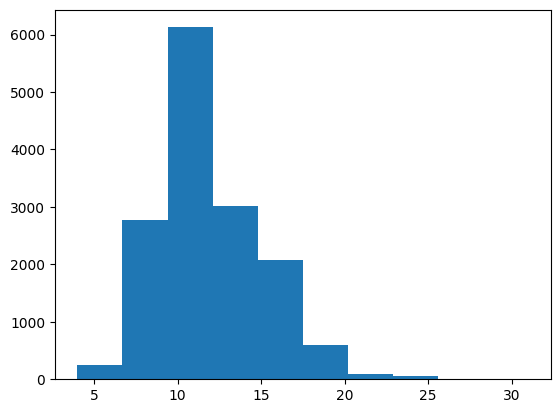

In [43]:
plt.hist(sent_count_in_para)

In [44]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_enc.fit_transform(train_data["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_enc.fit_transform(test_data["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_enc.fit_transform(dev_data["target"].to_numpy().reshape(-1,1))

# one Hot Encoding done in alphabetical order
# eg. ["BACKGROUND","CONCLUSION","METHODS","OBJECTS","RESULTS"]
# [0 , 0 , 1 , 0 , 0]

test_labels = constant(test_labels_one_hot)
train_labels = constant(train_labels_one_hot)
val_labels = constant(val_labels_one_hot)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

train_labels_encoded = label_enc.fit_transform(train_data["target"].to_numpy())
val_labels_encoded = label_enc.fit_transform(dev_data["target"].to_numpy())
test_labels_encoded = label_enc.fit_transform(test_data["target"].to_numpy())



In [46]:
num_classes = len(label_enc.classes_)
class_names = label_enc.classes_

label_enc.inverse_transform([0,4]) # 0 = BACKGROUND
# can access class using label_enc.inverse_transform([0,4])

array(['BACKGROUND', 'RESULTS'], dtype=object)

15-09-23
> Note: DataModeling Almost done
* Abstract:
    * Labels:
        1. test_labels: one hot encoded tensors
        2. train_labels:  one hot encoded tensors shape = (180028, 5)
        3. val_labels:
    * Data:
        1. train_data: pd.DataFrame
        2. dev_data
        3. test_data


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_nv = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_nv.fit(X=train_data["text"],
            y=train_labels_encoded)




Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [48]:
model_nv.score(X=dev_data["text"],
              y=val_labels_encoded
              )

0.7220014570501357

In [49]:
pred = model_nv.predict(test_data["text"])

> note: so far we got 72% of accuracy we need more experimenting

In [50]:
# base_accuracy = hf.accuracy_of_model(test_labels_encoded,pred)
# base_accuracy # reference accuracy for further experimenting


base_accuracy = accuracy_of_model(test_labels_encoded,pred)
base_accuracy # reference accuracy for further experimenting

{'accuracy': 71.66052395656938,
 'precision': 0.7124522262544967,
 'recall': 0.7166052395656938,
 'f1': 0.6924182031316956}

 #### Deep Sequence Models

   * Goal is preparing Data in a proper form
   * and getting insights so that we can customize model for best result


##### Data insights
 * **avg sentence length in train data**

In [51]:
temp = []

for sentence in train_data["text"]:

    sentence_word_count = len(sentence.split(" "))
    temp.append(sentence_word_count)
    # print(temp)
avg_sent_word_count = np.mean(temp)
max_sentence_word_count = np.median(temp)


In [52]:
print(f"avg no of words in sentence: {avg_sent_word_count}")
print(f"median of sentence length: {max_sentence_word_count}")


avg no of words in sentence: 26.338069633612548
median of sentence length: 23.0


(array([4.6220e+03, 2.0864e+04, 3.5049e+04, 3.6423e+04, 2.8878e+04,
        2.0005e+04, 1.2593e+04, 7.6670e+03, 4.8980e+03, 2.6580e+03,
        2.0780e+03, 1.3590e+03, 8.9500e+02, 6.0000e+02, 4.4400e+02,
        2.9200e+02, 2.0300e+02, 1.2500e+02, 1.0000e+02, 6.5000e+01,
        4.9000e+01, 3.6000e+01, 2.6000e+01, 2.3000e+01, 1.2000e+01,
        8.0000e+00, 1.1000e+01, 4.0000e+00, 5.0000e+00, 4.0000e+00,
        3.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,   6.9,  12.8,  18.7,  24.6,  30.5,  36.4,  42.3,  48.2,
         54.1,  60. ,  65.9,  71.8,  77.7,  83.6,  89.5,  95.4, 101.3,
        107.2, 113.1, 119. , 124.9, 130.8, 136.7, 142.6, 148.5, 154.4,
        160.3, 166.2, 172.1, 178. , 183.9, 189.8, 195.7, 201.6, 207.5,
        213.4, 219.3, 225.2, 231.1

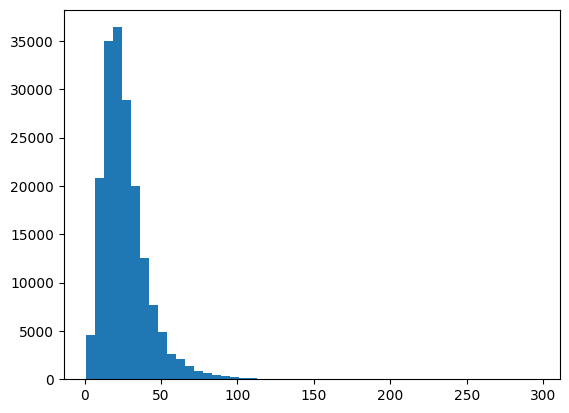

In [53]:
plt.hist(temp,bins=50,stacked=True)

💡 most sentence length is leass than 50 mostly around 25

  * **Text Vectorization length we will take to 60 using above hist**

In [54]:
from tensorflow import keras


In [55]:
MAX_TOKEN = 68000 # from paper
otp_seq_ln = 60
text_vectorizer_layer = keras.layers.TextVectorization(max_tokens=MAX_TOKEN,
                                                 output_sequence_length=otp_seq_ln
)
text_vectorizer_layer.adapt(train_data["text"])

In [56]:
text_vectorizer_layer(["ok i am in hospital"]) # mapped sentence to integer

<tf.Tensor: shape=(1, 60), dtype=int64, numpy=
array([[15664,   388,  2650,     5,   237,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0]])>

In [57]:
total_words_saved = len(text_vectorizer_layer.get_vocabulary())
# Embedding layer
embedding_layer = keras.layers.Embedding(total_words_saved,
                       output_dim=512,
                       mask_zero=True,
                       name="Token_Embadding_Layer"
                       )


In [58]:
temp_sent = np.random.choice(train_data["text"])
tokened = text_vectorizer_layer([temp_sent])
tokened

<tf.Tensor: shape=(1, 60), dtype=int64, numpy=
array([[   12,     7,  2529,     9,     7,  8582,   110,    48,     7,
         1683,    69, 23956,  9793,     7,  8582,    44,   542,     4,
            2,   182,   214,     4,   390,   674,  1176,  8582,    48,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0]])>

In [59]:
print("sentence:")
print(temp_sent+ "\n")
print("Tokened sentence")
print(tokened)
print("Embedded Sentece:")
print(embedding_layer(tokened)) # each word is represented by 512 long vector

sentence:
patients with @ ae were @ % with rilonacept versus @ % placebo , with slightly more ae-related withdrawals with rilonacept ( @ % vs @ % ) because of the greater incidence of injection site reactions ( @ % rilonacept , @ % placebo ) .

Tokened sentence
tf.Tensor(
[[   12     7  2529     9     7  8582   110    48     7  1683    69 23956
   9793     7  8582    44   542     4     2   182   214     4   390   674
   1176  8582    48     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]], shape=(1, 60), dtype=int64)
Embedded Sentece:
tf.Tensor(
[[[ 0.01402401  0.04022202 -0.00172511 ... -0.01104707 -0.04075044
    0.00583769]
  [ 0.01633098 -0.01082461 -0.04575042 ...  0.03600829 -0.04685465
   -0.03982732]
  [ 0.01172547  0.04590276  0.01994138 ...  0.02532777  0.0413372
    0.04788869]
  ...
  [-0.03995019  0.00769468 -0.0024588  ... 

In [60]:
from tensorflow import data

In [61]:
train_dataset = data.Dataset.from_tensor_slices((train_data["text"],train_labels_one_hot)) # we ll use one hot encoding
val_dataset = data.Dataset.from_tensor_slices((dev_data["text"],val_labels_one_hot)) # we ll use one hot encoding

test_dataset = data.Dataset.from_tensor_slices((test_data["text"],test_labels_one_hot)) # we ll use one hot encoding

train_dataset
# fast dataloading

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [62]:
train_dataset = train_dataset.batch(32).prefetch(data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(data.AUTOTUNE)


##### MODEL

In [63]:
from tensorflow import string as tfstr

inputs = keras.layers.Input(shape=(1,),dtype=tfstr)
text_vectors = text_vectorizer_layer(inputs)
embedded_output = embedding_layer(text_vectors)
x = keras.layers.Conv1D(64,kernel_size=5, padding="same",activation="relu")(embedded_output)
x = keras.layers.GlobalMaxPool1D()(x)
outputs = keras.layers.Dense(num_classes,activation="softmax")(x)

modelConv1DUntrainedEmbedding = keras.Model(inputs,outputs)

modelConv1DUntrainedEmbedding.compile(loss="categorical_crossentropy",
                                      optimizer=keras.optimizers.Adam(),
                                      metrics=["accuracy"])


In [64]:
history_model1 = modelConv1DUntrainedEmbedding.fit(train_dataset,
                                                   steps_per_epoch=int(0.1*len(train_dataset)),
                                                   epochs=3,
                                                   validation_data=val_dataset,
                                                   validation_steps=int(0.1*len(val_dataset)),
                                                   )

Epoch 1/3
562/562 [==============================] - 46s 65ms/step - loss: 0.7614 - accuracy: 0.7124 - val_loss: 0.5625 - val_accuracy: 0.7955
Epoch 2/3
562/562 [==============================] - 14s 26ms/step - loss: 0.5693 - accuracy: 0.7910 - val_loss: 0.5395 - val_accuracy: 0.7975
Epoch 3/3
562/562 [==============================] - 15s 26ms/step - loss: 0.5402 - accuracy: 0.8013 - val_loss: 0.5179 - val_accuracy: 0.8045


In [65]:
print(f"Accuracy on validation dataset: {modelConv1DUntrainedEmbedding.evaluate(val_dataset)}")

test_dataset_prediction = modelConv1DUntrainedEmbedding.predict(test_dataset)
pred_model1 =  np.argmax(test_dataset_prediction,axis=1)
# print(hf.accuracy_of_model(np.argmax(test_labels,axis=1),pred_model1 ))
print(accuracy_of_model(np.argmax(test_labels,axis=1),pred_model1 ))


944/944 [==============================] - 5s 5ms/step - loss: 0.5193 - accuracy: 0.8044
Accuracy on validation dataset: [0.5193361639976501, 0.8043578863143921]
942/942 [==============================] - 3s 3ms/step
{'accuracy': 80.0776969817711, 'precision': 0.8014039078764594, 'recall': 0.800776969817711, 'f1': 0.7994742560792792}


##### comparison base to model 1 on test data
   | Model                    | Accuracy |   Precision   | Recall | f1 |
    |--------------------------|----------|:-------------:|-------:|------:|
    | base                  | 71.6605 | 0.71245|  0.71660 | 0.692418 |
    | conv1D trained embedding |  79.430222 |   0.797181    |    0.79430 | 0.79256 |
    
> note : 80% accuracy on training dataset
commented as it is taking lot of time to fit


In [66]:
# universal sentence encoder downloaded from tensorflow hub
import tensorflow_hub as hub
# embedding_layer_tfhub = hub.KerasLayer("../data/use")


tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")






##### character level embedding


In [67]:
def split_sen_to_char(text):
    return " ".join(list(text))

split_sen_to_char("ok get it")

'o k   g e t   i t'

In [68]:
train_chars = [split_sen_to_char(sent) for sent in train_data["text"]]
val_chars = [split_sen_to_char(sent) for sent in dev_data["text"]]
test_chars = [split_sen_to_char(sent) for sent in test_data["text"]]


In [69]:
len_char = [len(sentence) for sentence in train_chars]
mean_len_char = np.mean(len_char)

In [70]:
print(f"Avg no of char in sentence: {mean_len_char} \n" )
OUTPUT_SEQ_LEN = round(mean_len_char)

Avg no of char in sentence: 297.7297309307441 



(array([2.2108e+04, 7.0578e+04, 5.3948e+04, 2.2389e+04, 7.4540e+03,
        2.2340e+03, 8.0200e+02, 2.8700e+02, 1.1800e+02, 4.9000e+01,
        2.9000e+01, 1.3000e+01, 8.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03, 1.5245e+03, 1.6630e+03, 1.8015e+03, 1.9400e+03,
        2.0785e+03, 2.2170e+03, 2.3555e+03, 2.4940e+03, 2.6325e+03,
        2.7710e+03]),
 <BarContainer object of 20 artists>)

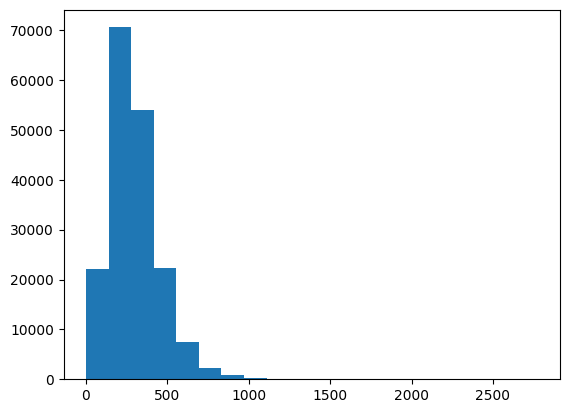

In [71]:
plt.hist(len_char, bins = 20)

In [72]:
import string
len_all_chars = len(string.ascii_lowercase + string.digits + string.punctuation)


In [73]:
# token level embeding
vectorize_char_level_layer = keras.layers.TextVectorization(max_tokens=len_all_chars,
                                                            output_sequence_length=OUTPUT_SEQ_LEN,
                                                            name = "layer_char_level_vectorizeing"
                                                            )


In [74]:
vectorize_char_level_layer.adapt(train_chars)
OUTPUT_DIM_CHAR_LEVEL = 25
embedding_char_level = keras.layers.Embedding(input_dim=OUTPUT_SEQ_LEN ,
                                              output_dim=25,
                                              mask_zero=True,
                                              name = "embedding_char_layer")

In [75]:
# train_char_dataset = data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(data.AUTOTUNE)
# val_char_dataset = data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(data.AUTOTUNE)


##### Multimodal Modal as described in paper

In [76]:
from tensorflow import string as tfstr

# token lavel encoding
layer_input_token = keras.layers.Input(shape=[],
                                 dtype=tfstr,name="layer_input_token")
layer_embedding_token = tf_hub_embedding_layer(layer_input_token)
layer_output_token = keras.layers.Dense(128,activation="relu")(layer_embedding_token)
model_token = keras.Model(inputs = layer_input_token,
                          outputs = layer_output_token)

# char level encodding




input_char = keras.layers.Input(shape=(1,),
                                 dtype=tfstr,
                                name="layer_input_char")
char_vecotorizer = vectorize_char_level_layer(input_char)

layer_embedding_char = embedding_char_level(char_vecotorizer)

layer_output_char_bidir = keras.layers.Bidirectional(keras.layers.LSTM(25))(layer_embedding_char)
model_char = keras.Model(inputs = input_char,
                          outputs = layer_output_char_bidir)

# concatenation

token_char_concat = keras.layers.Concatenate(name="token_char_hybrid")([model_token.output, model_char.output])


combined_dropout = keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = keras.layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = keras.layers.Dropout(0.5)(combined_dense)
output_layer = keras.layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_token_and_char = keras.Model(inputs=[model_token.input, model_char.input],
                         outputs=output_layer,
                         name="model_token_and_char_embeddings")


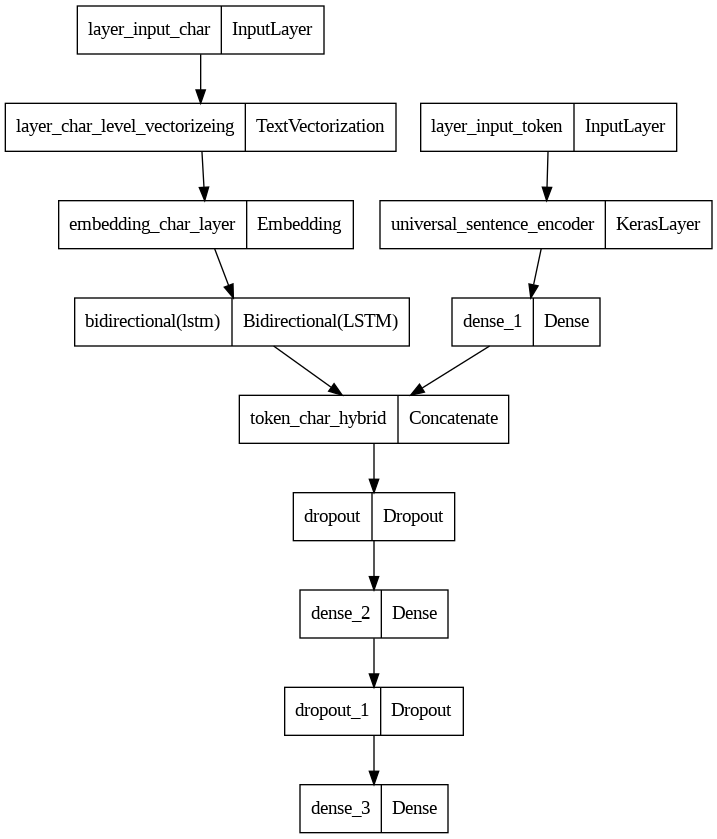

In [77]:
from tensorflow.keras.utils import plot_model
plot_model(model_token_and_char)

In [78]:
## creating dataset for mulinput modal
train_char_token_data = data.Dataset.from_tensor_slices((train_data["text"], train_chars)) # make data
train_char_token_labels = data.Dataset.from_tensor_slices(train_labels) # make labels
train_char_token_dataset = data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels


train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(data.AUTOTUNE)


# validation dataset

val_char_token_data = data.Dataset.from_tensor_slices((dev_data["text"], val_chars))
val_char_token_labels = data.Dataset.from_tensor_slices(val_labels)
val_char_token_dataset = data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(data.AUTOTUNE)

In [79]:

model_token_and_char.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

model_token_and_char_history = model_token_and_char.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 42s 52ms/step - loss: 0.9830 - accuracy: 0.6085 - val_loss: 0.7785 - val_accuracy: 0.6981
Epoch 2/3
562/562 [==============================] - 25s 44ms/step - loss: 0.7896 - accuracy: 0.6925 - val_loss: 0.7105 - val_accuracy: 0.7287
Epoch 3/3
562/562 [==============================] - 24s 44ms/step - loss: 0.7684 - accuracy: 0.7069 - val_loss: 0.6878 - val_accuracy: 0.7387


In [80]:
model_token_and_char.evaluate(val_char_token_dataset)

944/944 [==============================] - 17s 18ms/step - loss: 0.6898 - accuracy: 0.7379


[0.6897720098495483, 0.7378965616226196]

##### comparison base to model 1 on test data
    | Model                    | Accuracy |   Precision   | Recall | f1 |
    |--------------------------|----------|:-------------:|-------:|------:|
    | base                  | 71.6605 | 0.71245|  0.71660 | 0.692418 |
    | conv1D trained embedding |  79.430222 |   0.797181    |    0.79430 | 0.79256 |
    | model_token_and_char | 0.7386  |       |     |  |
    
> note : 80% accuracy on training dataset
commented as it is taking lot of time to fit

<Axes: ylabel='Frequency'>

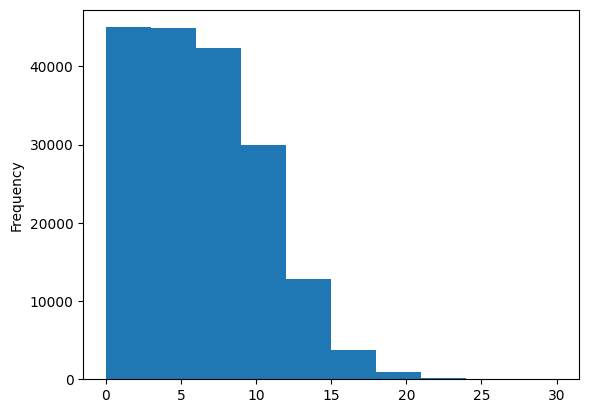

In [81]:
train_data.line_number.plot.hist()

##### Adding positional feature embedding layer

#### feature engineering
> **NOTE:** one hot encode line number as a feature of our data as position embedding layer

> **NOTE:** from hist it is clear that line_number 15 is appearing in more than 10000 examples

In [82]:
import tensorflow as tf
train_line_number_one_hot = tf.one_hot(train_data["line_number"].to_numpy(),depth = 15)
val_line_number_one_hot = tf.one_hot(dev_data["line_number"].to_numpy(),depth = 15)

test_line_number_one_hot = tf.one_hot(test_data["line_number"].to_numpy(),depth = 15)


In [83]:

train_total_lines_one_hot = tf.one_hot(train_data["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(dev_data["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_data["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180028, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [84]:

# model for token level feature
layer_input_token = keras.layers.Input(shape=[],
                                 dtype=tfstr,name="layer_input_token")
layer_embedding_token = tf_hub_embedding_layer(layer_input_token)
layer_output_token = keras.layers.Dense(128,activation="relu")(layer_embedding_token)
model_token = keras.Model(inputs = layer_input_token,
                          outputs = layer_output_token)


# model for char level feature




input_char = keras.layers.Input(shape=(1,),
                                 dtype=tfstr,
                                name="layer_input_char")
char_vecotorizer = vectorize_char_level_layer(input_char)

layer_embedding_char = embedding_char_level(char_vecotorizer)

layer_output_char_bidir = keras.layers.Bidirectional(keras.layers.LSTM(25))(layer_embedding_char)
model_char = keras.Model(inputs = input_char,
                          outputs = layer_output_char_bidir)


# concatenation combine 1 and 2

token_char_concat = keras.layers.Concatenate(name="token_char_hybrid_embedding")([model_token.output, model_char.output])

z = keras.layers.Dense(256,activation = "relu")(token_char_concat)
z = keras.layers.Dropout(0.5)(z)


# model for token line_number feature
line_number_inputs = keras.layers.Input(shape= (15,), dtype = tf.float32,name = "line_number_input")

x = keras.layers.Dense(32,activation = "relu" )(line_number_inputs)

line_number_model = keras.Model(inputs = line_number_inputs,
                                outputs = x)
# model for total_lines level feature

total_line_inputs = keras.layers.Input(shape= (20,), dtype = tf.float32, name = "toal_lines_input")

y = keras.layers.Dense(32,activation = "relu" )(total_line_inputs)

toal_lines_model = keras.Model(inputs = total_line_inputs,
                                outputs = y)

# combine outputs of z, line_number model, total_lines model

tribrid_embedding = keras.layers.Concatenate(name = "concatenation_of_char_token_positional_embedding")([line_number_model.output,toal_lines_model.output,z])

# layer that accepts aboube concatenated embedding

output_layer = keras.layers.Dense(5,activation = 'softmax',name = "final_output")(tribrid_embedding)

model_with_extra_feature = keras.Model(inputs = [line_number_model.input,toal_lines_model.input,model_token.input,model_char.input],
                                       outputs = output_layer)


# 5. Construct model with char and token inputs



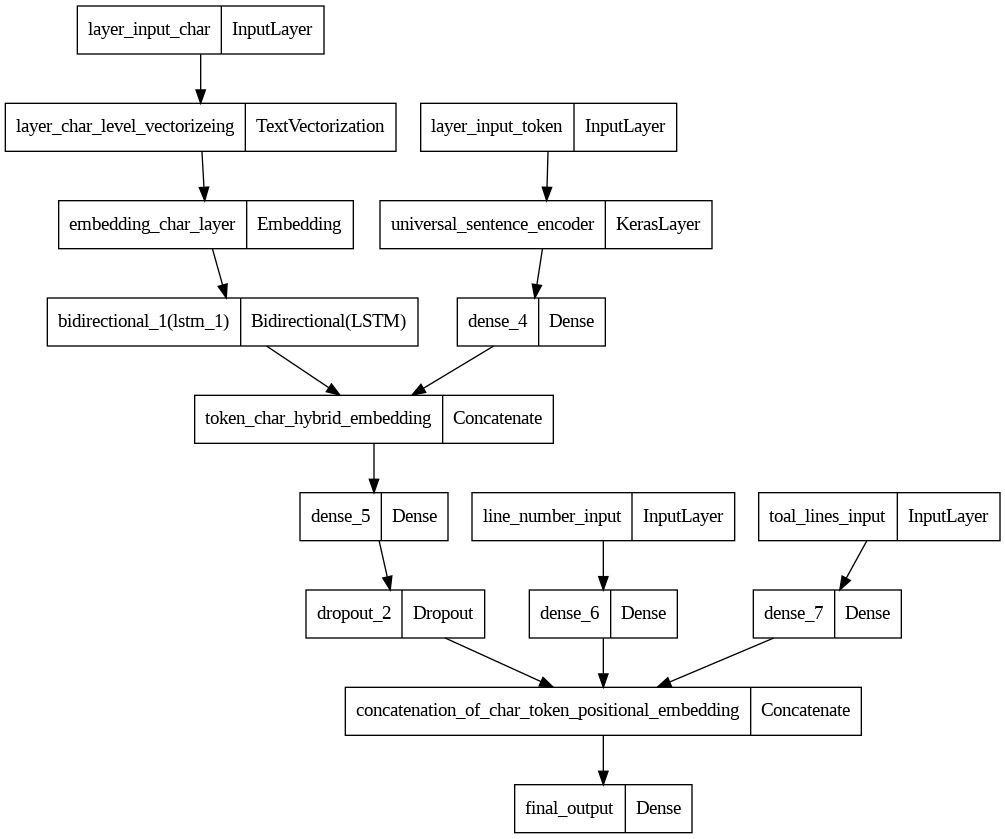

In [85]:
plot_model(model_with_extra_feature)

In [86]:


model_with_extra_feature.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [87]:

train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_data["text"], # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                              val_total_lines_one_hot,
                                                              dev_data["text"],
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [88]:
val_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [89]:

# Fit the token, char and positional embedding model
model_with_extra_feature_history = model_with_extra_feature.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 40s 52ms/step - loss: 1.0907 - accuracy: 0.7294 - val_loss: 0.9778 - val_accuracy: 0.8049
Epoch 2/3
562/562 [==============================] - 26s 47ms/step - loss: 0.9679 - accuracy: 0.8174 - val_loss: 0.9498 - val_accuracy: 0.8218
Epoch 3/3
562/562 [==============================] - 23s 41ms/step - loss: 0.9489 - accuracy: 0.8231 - val_loss: 0.9379 - val_accuracy: 0.8291


In [90]:
random_med_para = 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.'

In [91]:
random_med_para

'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.'

##### On random data

In [92]:
# trained pipeline
 # create sentence splitting pipeline object

def para_to_formatted_inp(para = random_med_para):
  """
  function return list of dic obj containe text line number total lines
  """
  from spacy.lang.en import English
  nlp = English()
  sentencizer = nlp.add_pipe("sentencizer")
  doc = nlp(para)
  abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
  total_lines = len(abstract_lines)
  temp_list = []

  i = 0
  for line in abstract_lines:
    temp_dict = {}
    temp_dict["text"] = line
    temp_dict["line_number"] = i
    temp_dict["total_lines"] = total_lines
    i = i+1
    temp_list.append(temp_dict)



  return temp_list
lines = para_to_formatted_inp()
pd.DataFrame(lines)

,text,line_number,total_lines
0,This RCT examined the efficacy of a manualized...,0,8
1,Participants were randomly assigned to treatme...,1,8
2,Treatment included instruction and therapeutic...,2,8
3,A response-cost program was applied to reduce ...,3,8
4,Significant treatment effects were found for f...,4,8
5,Secondary measures based on staff ratings (tre...,5,8
6,"High levels of parent, child and staff satisfa...",6,8
7,Standardized effect size estimates were primar...,7,8


In [93]:
line_number_list = [line["line_number"] for line in lines]
total_line_list = [line["total_lines"] for line in lines]


In [94]:
import tensorflow as tf

In [97]:
one_hot_line_number = tf.one_hot(line_number_list,depth = 15)
one_hot_total_lines = tf.one_hot(total_line_list,depth = 20)
line_list = [line["text"] for line in lines]
splitted_lines_in_chars = [split_sen_to_char(line["text"]) for line in lines]


['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [113]:
predected = model_with_extra_feature.predict(x = (one_hot_line_number,
                                       one_hot_total_lines,
                                       tf.constant(line_list),
                                       tf.constant(splitted_lines_in_chars)))

1/1 [==============================] - 0s 34ms/step


In [114]:
predected = tf.argmax(predected,axis = 1)

In [125]:
test_abstract_pred_classes = [label_enc.classes_[i] for i in predected]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [126]:
for i, line in enumerate(line_list):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


In [129]:
def transform_para(predictions=test_abstract_pred_classes,lines_list = line_list):
  temp_dic = {}
  for tag in label_enc.classes_:
    temp_dic[tag] = []

  return temp_dic


transform_para()



{'BACKGROUND': [],
 'CONCLUSIONS': [],
 'METHODS': [],
 'OBJECTIVE': [],
 'RESULTS': []}

This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


to

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.

METHODS: Participants were randomly assigned to treatment or wait-list conditions.

METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.

METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.

RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).

METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.

RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.

RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group